## DATASET OBSERVATIONS
The SNS dataset contains 30000 observations (rows) each preresents a high school student and
40 features (columns) that provides information for the student. The 40 features includes
graduation year, the gender, age and number of friends one has connected throught the SNS for
each student, and the remaining 36 columns are word/s terms such as football, shopping, hot,
church etc. that describes the student interest and beliefs with value of 1 indicates a belonging to
the group, and 0 otherwise. Information like this can help to group individuals into clusters with
similar interest, and provide help for companies’ marketing teams to advertise appropriate
products online targeting students with certain interest or belief.
THE feature 'Age' has some missing values .


## Imports

In [9]:
import numpy as np #linear algebra 
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

from sklearn.cluster import KMeans #K-Means
from sklearn.cluster import DBSCAN #DBSCAN

from sklearn.preprocessing import StandardScaler #scaler

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.2
numpy version: 1.23.5
seaborn version: 0.12.2


In [11]:
import pandas as pd

sns_data = pd.read_csv(r'C:\Users\Lenovo\Downloads\d1\snsdata.csv')
print(sns_data)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0             0           0         0  ...  

In [12]:
sns_data.loc[(sns_data['age'] < 13) | (sns_data['age'] > 20) ,'age' ]= float('NaN')
sns_data.to_csv('output.csv', index=False)

In [13]:
str(sns_data)

'       gradyear gender     age  friends  basketball  football  soccer  \\\n0          2006      M  18.982        7           0         0       0   \n1          2006      F  18.801        0           0         1       0   \n2          2006      M  18.335       69           0         1       0   \n3          2006      F  18.875        0           0         0       0   \n4          2006    NaN  18.995       10           0         0       0   \n...         ...    ...     ...      ...         ...       ...     ...   \n29995      2009      M  16.115        0           0         0       0   \n29996      2009      M  15.792        1           0         1       0   \n29997      2009      M  15.784        0           0         1       0   \n29998      2009      M  16.378        0           0         0       0   \n29999      2009      F  18.724        3           2         0       0   \n\n       softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \\\n0             0           0

In [14]:
#i will determine the number of missing values in each of the columns
missing_values = sns_data.isnull().sum()
print(missing_values)


gradyear           0
gender          2724
age             5523
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64


In [15]:
data=pd.read_csv('output.csv')
print(data)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0             0           0         0  ...  

## observed
The columns'age' and 'gender' contains missing values.
We have replaced values beyond range(13-20) with Nan, in feature age.

## Data preparation
replacing missing values with unknown
and all other as 0 except for male using binary coding.

In [16]:
data['gender'].fillna('Unknown', inplace=False)

0              M
1              F
2              M
3              F
4        Unknown
          ...   
29995          M
29996          M
29997          M
29998          M
29999          F
Name: gender, Length: 30000, dtype: object

In [17]:
data['gender'].fillna('Unknown', inplace=True)

In [18]:
data=pd.read_csv('output.csv')
print(data)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  blonde  mall  shopping  clothes  \
0             0           0         0  ...  

In [19]:
data['is male']=data['gender'].apply(lambda x: 1 if x == 'M' else 0)
data['is female']=data['gender'].apply(lambda x: 1 if x == 'F' else 0)
data['is Unkomwn']=data['gender'].apply(lambda x: 1 if x == 'Unknown' else 0)
print(data)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  clothes  hollister  abercrombie  \
0             0           0         0  ...  

In [20]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\d1\output6.csv')
print(df)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  clothes  hollister  abercrombie  \
0             0           0         0  ...  

## Handling missing value- age
Replace missing value by mean of remaining as per underlying year of passing (gradeyear)

In [21]:
##compute the means by year 
means_by_year =df.groupby('gradyear')['age'].mean()

In [22]:
## replace missing values with mean by year of passing 
df['age'] = df.apply(lambda x: means_by_year[x['gradyear']] if pd.isna(x['age']) else x['age'] , axis=1)

In [23]:
print(df)

       gradyear gender     age  friends  basketball  football  soccer  \
0          2006      M  18.982        7           0         0       0   
1          2006      F  18.801        0           0         1       0   
2          2006      M  18.335       69           0         1       0   
3          2006      F  18.875        0           0         0       0   
4          2006    NaN  18.995       10           0         0       0   
...         ...    ...     ...      ...         ...       ...     ...   
29995      2009      M  16.115        0           0         0       0   
29996      2009      M  15.792        1           0         1       0   
29997      2009      M  15.784        0           0         1       0   
29998      2009      M  16.378        0           0         0       0   
29999      2009      F  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  clothes  hollister  abercrombie  \
0             0           0         0  ...  

## dropping only categorical feature


In [24]:
df = df.drop('gender', axis =1)

In [25]:
print(df)

       gradyear     age  friends  basketball  football  soccer  softball  \
0          2006  18.982        7           0         0       0         0   
1          2006  18.801        0           0         1       0         0   
2          2006  18.335       69           0         1       0         0   
3          2006  18.875        0           0         0       0         0   
4          2006  18.995       10           0         0       0         0   
...         ...     ...      ...         ...       ...     ...       ...   
29995      2009  16.115        0           0         0       0         0   
29996      2009  15.792        1           0         1       0         0   
29997      2009  15.784        0           0         1       0         0   
29998      2009  16.378        0           0         0       0         0   
29999      2009  18.724        3           2         0       0         1   

       volleyball  swimming  cheerleading  ...  clothes  hollister  \
0               0

In [26]:
missing_values = df.isnull().sum()
print(missing_values)


gradyear        0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
is male         0
is female       0
is Unkomwn      0
dtype: int64


## standardizing the whole dataset
A z-scored normalization is applied to all of the numerical feature to elimiated bias generate for having higher weight calculation for features with larger range.

In [27]:
from sklearn.preprocessing import StandardScaler
num_cols=df.select_dtypes(include=["float64", "int64"]).columns

In [28]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
X_std = df[num_cols]
df.to_csv('output7.csv', index=False)

In [29]:
df=pd.read_csv('output7.csv')
print(df)

       gradyear       age   friends  basketball  football    soccer  softball  \
0     -1.341641  1.528000 -0.634528   -0.332217 -0.357697 -0.242874 -0.217928   
1     -1.341641  1.369479 -0.826150   -0.332217  1.060049 -0.242874 -0.217928   
2     -1.341641  0.961352  1.062695   -0.332217  1.060049 -0.242874 -0.217928   
3     -1.341641  1.434288 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
4     -1.341641  1.539385 -0.552404   -0.332217 -0.357697 -0.242874 -0.217928   
...         ...       ...       ...         ...       ...       ...       ...   
29995  1.341641 -0.982943 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
29996  1.341641 -1.265829 -0.798775   -0.332217  1.060049 -0.242874 -0.217928   
29997  1.341641 -1.272835 -0.826150   -0.332217  1.060049 -0.242874 -0.217928   
29998  1.341641 -0.752605 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
29999  1.341641  1.302041 -0.744026    2.153199 -0.357697 -0.242874  1.133982   

       volleyball  swimming

In [30]:
from scipy import stats

In [31]:
interests = df.iloc[:, 4:40]
interests_z = pd.DataFrame(stats.zscore(interests), columns=interests.columns)

In [32]:
print(interests_z.iloc[:, 4:10].describe())

           swimming  cheerleading      baseball        tennis        sports  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   2.273737e-17 -1.326346e-17  1.800042e-17 -2.036889e-17 -2.842171e-17   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -2.599706e-01 -2.073271e-01 -2.011306e-01 -1.689389e-01 -2.971234e-01   
25%   -2.599706e-01 -2.073271e-01 -2.011306e-01 -1.689389e-01 -2.971234e-01   
50%   -2.599706e-01 -2.073271e-01 -2.011306e-01 -1.689389e-01 -2.971234e-01   
75%   -2.599706e-01 -2.073271e-01 -2.011306e-01 -1.689389e-01 -2.971234e-01   
max    5.970348e+01  1.729137e+01  3.046682e+01  2.884728e+01  2.517666e+01   

               cute  
count  3.000000e+04  
mean  -3.789561e-18  
std    1.000017e+00  
min   -4.023622e-01  
25%   -4.023622e-01  
50%   -4.023622e-01  
75%   -4.023622e-01  
max    2.202956e+01  


In [33]:
print(df)

       gradyear       age   friends  basketball  football    soccer  softball  \
0     -1.341641  1.528000 -0.634528   -0.332217 -0.357697 -0.242874 -0.217928   
1     -1.341641  1.369479 -0.826150   -0.332217  1.060049 -0.242874 -0.217928   
2     -1.341641  0.961352  1.062695   -0.332217  1.060049 -0.242874 -0.217928   
3     -1.341641  1.434288 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
4     -1.341641  1.539385 -0.552404   -0.332217 -0.357697 -0.242874 -0.217928   
...         ...       ...       ...         ...       ...       ...       ...   
29995  1.341641 -0.982943 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
29996  1.341641 -1.265829 -0.798775   -0.332217  1.060049 -0.242874 -0.217928   
29997  1.341641 -1.272835 -0.826150   -0.332217  1.060049 -0.242874 -0.217928   
29998  1.341641 -0.752605 -0.826150   -0.332217 -0.357697 -0.242874 -0.217928   
29999  1.341641  1.302041 -0.744026    2.153199 -0.357697 -0.242874  1.133982   

       volleyball  swimming

## INFERENCE 
To compare the performance of DBSCAN and agglomerative clustering on the sns dataset, we can evaluate several metrics such as silhouette score and visual inspection of the clusters.

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. A score of 1 indicates that the data point is in the correct cluster, while a score of -1 indicates that the data point is in the wrong cluster. A score of 0 indicates that the data point is on the boundary between two clusters.

Visual inspection of the clusters can also be used to evaluate the performance of the clustering algorithms. We can plot the clusters using different colors or shapes and examine if the clusters are well-separated and meaningful.

Based on the evaluation metrics, we can determine which clustering algorithm performs better on the sns dataset. If DBSCAN has a higher silhouette score and produces more meaningful and well-separated clusters, then it may be the better clustering algorithm for this dataset. On the other hand, if agglomerative clustering has a higher silhouette score and produces more meaningful and well-separated clusters, then it may be the better clustering algorithm for this dataset. Ultimately, the choice of clustering algorithm will depend on the specific characteristics of the dataset and the goals of the analysis

## Model Training
1(KMEANS CLUSTERING)

The set.seed() can be used to ensure the result matches each run since the k-means utilized random starting points. Using the kmeans() on the dataset, set the number of cluster to 5, a cluster object is then generated/modeled.

In [34]:
##using seed to initialize random number generator to a specific sequence
import numpy as np
np.random.seed(2648)

In [35]:
#i will use kmeans(), from the stats package, over the dataframe to divide the teenagers' interest
#data into five clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std)
## FIT THE MODEL INTO DATA

y_pred = kmeans.predict(X_std)
cluster_labels = kmeans.labels_

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

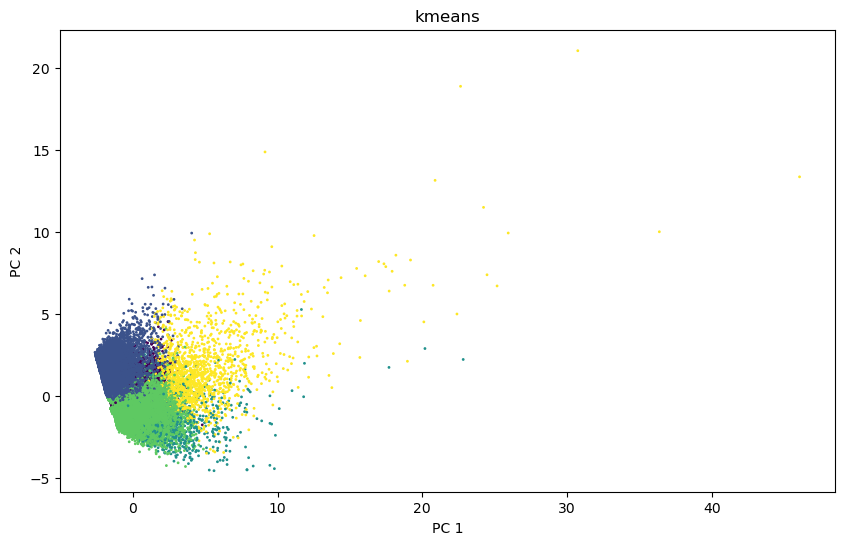

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred, s=1)
plt.title("kmeans")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [38]:
unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, label_counts))
print(cluster_sizes)

{0: 11162, 1: 5049, 2: 968, 3: 11361, 4: 1460}


In [39]:
cluster_centers= kmeans.cluster_centers_
print(cluster_centers)

[[-8.84490892e-01  8.39955496e-01 -5.71285295e-02 -1.32261744e-01
  -1.32244983e-01 -7.31127780e-02 -4.06123220e-02 -6.77110017e-02
  -4.87254886e-02 -3.38347183e-02 -1.15613699e-01 -2.04177071e-02
  -1.16640341e-01 -2.11950541e-02 -8.31175976e-02 -5.31014810e-02
  -7.78046269e-02 -1.18364549e-01 -5.13785439e-02 -4.93394511e-02
  -4.73628465e-03 -7.68810675e-02 -1.04106362e-01 -1.08504203e-02
  -3.53450259e-02 -1.36899865e-02 -1.36706603e-03 -1.45545509e-01
   6.08768014e-02 -2.47370214e-02 -1.09803753e-01 -9.05149656e-03
  -9.60203106e-02 -1.48255754e-01 -1.45535899e-01 -8.23334308e-02
  -4.49339622e-02 -5.92337990e-02 -1.05157892e-01 -4.59076762e-01
   3.26156659e-01  0.00000000e+00]
 [-1.15589967e-01  1.74814450e-01 -1.54510531e-01  5.19909241e-02
   2.83082358e-01 -1.52772550e-02 -2.06681988e-01 -1.73840106e-01
  -1.08643493e-01 -1.92308744e-01  3.30349942e-01  3.14372114e-02
   1.11126503e-01 -3.25106106e-01 -8.92486224e-02 -1.33833596e-01
  -1.65843845e-01 -1.50511816e-01 -2.0370

## 2-(DBSCAN)

In [40]:
from sklearn.cluster import DBSCAN

# create DBSCAN object with eps=0.5 and min_samples =5
dbscan =DBSCAN(eps = 0.5, min_samples = 5)

dbscan.fit(interests_z)

# get cludter lables for each each data points
cluster_labels = dbscan.labels_
 
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print("NUMBER OF CLUSTER:", n_clusters)
print("number of noise points:",n_noise )


NUMBER OF CLUSTER: 342
number of noise points: 21946


## 3-AGGLOMERATIVE CLUSTERING


In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
agg = AgglomerativeClustering(n_clusters=5, linkage="ward")
agg.fit(X_std)
y1_pred=agg.labels_



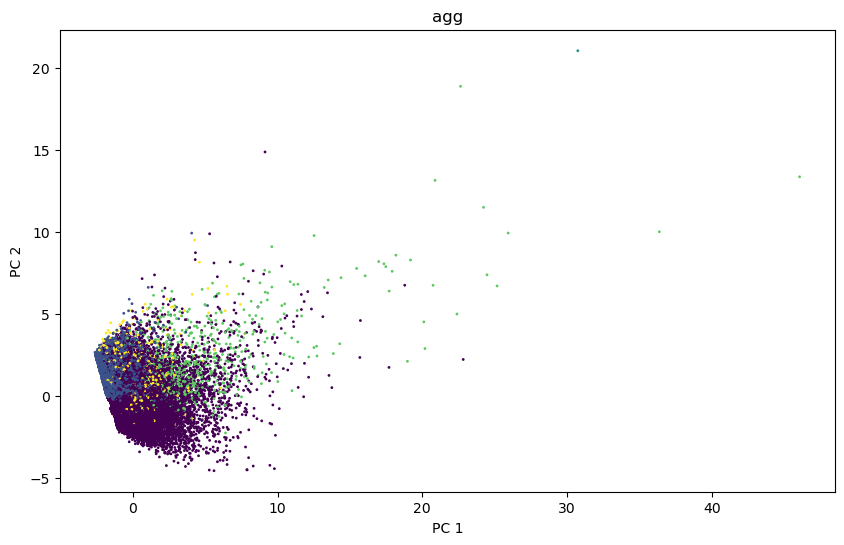

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y1_pred, s=1)
plt.title("agg")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [45]:
# get the cluster labels for each data points
cluster_labels = agg.labels_

In [46]:
# number of clusters
n1_clusters = len(set(cluster_labels))
print("NUMBER OF CLUSTER:", n1_clusters)

NUMBER OF CLUSTER: 5


In [47]:
import matplotlib.pyplot as plt



In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X_pca, "ward")

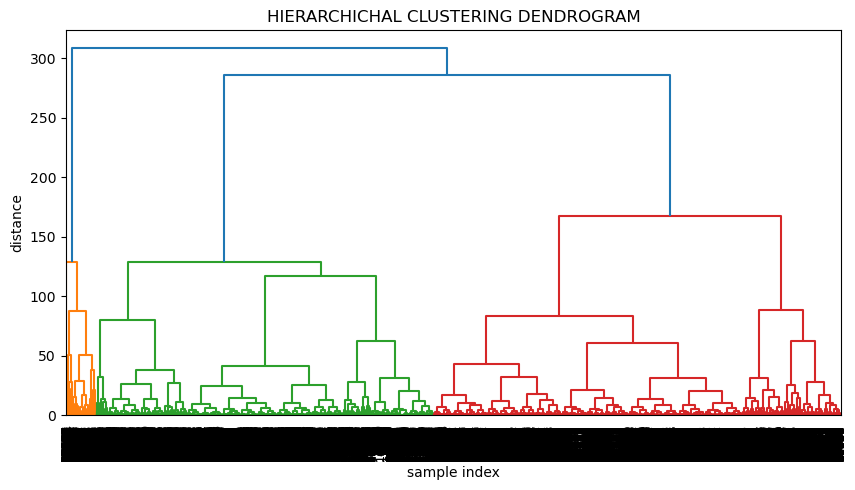

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.title("HIERARCHICHAL CLUSTERING DENDROGRAM")
plt.xlabel("sample index")
plt.ylabel("distance")
plt.show()

TASK B

## Objective:

 Analysis and confirm the benefit with using clusters as feature in
supervised learning

## DATASET 1 DESCRIPTION-iris dataset
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

## DATASET  DESCRIPTION-Mall Customer Segmentation Data
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing dat

In [121]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## load the iris dataset

In [ ]:
iris = load_iris()

In [52]:
## converting to a Pandas df
df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
## target variable
df['target']= iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


## STANDARDIZING THE DATATSET

In [53]:
X1 =iris.data
scalar = StandardScaler()
X1_std = scaler.fit_transform(X1)

## Adding cluster as a feature  in  the dataset.

## DBSCAN

In [60]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X1_std)
X_cluster = np.c_[X1_std, clusters]

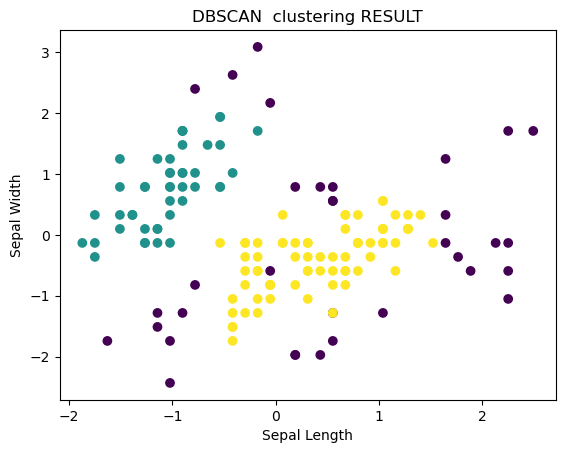

In [61]:
## visualzing the results
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN  clustering RESULT')
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [72]:
## Agglometrative clustering on iris dataset 
agg = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
y_cluster = agg.fit_predict(X1_std)

In [74]:
# adding cluster as a feature to the dataset
X_cluster = np.column_stack((X1_std, y_cluster))

## Dendrogram

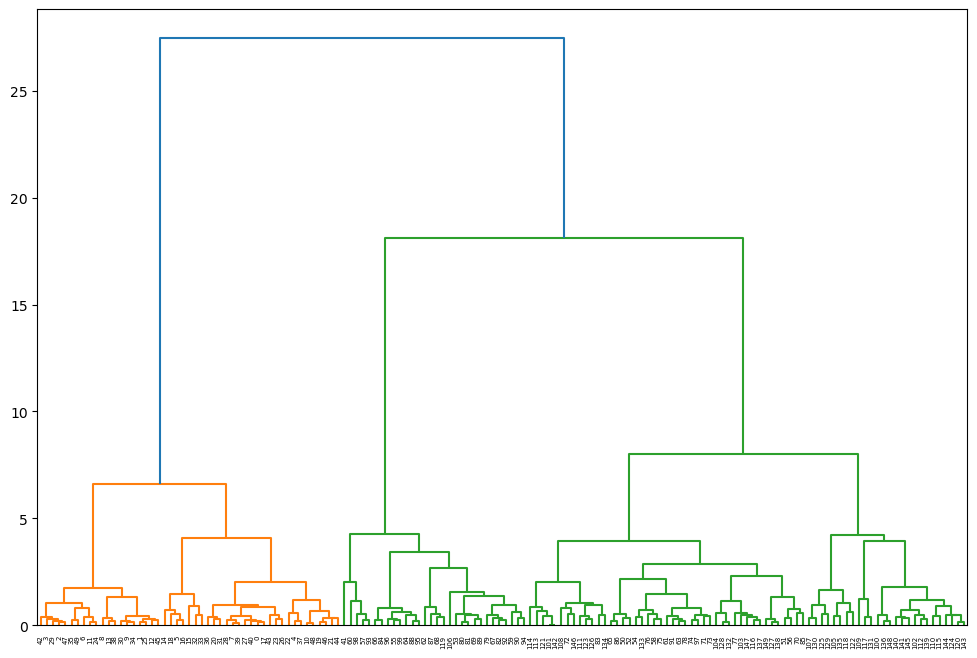

In [75]:
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(X_cluster, method = 'ward')
dendrogram(linkage_matrix)
plt.show()

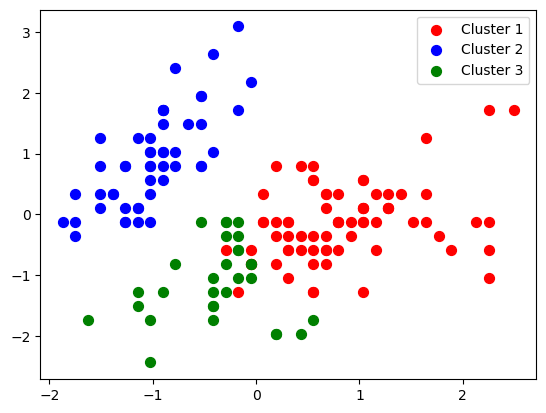

In [76]:
plt.scatter(X1_std[y_cluster == 0, 0], X1_std[y_cluster == 0, 1], s =50, color = 'red', label = 'Cluster 1')
plt.scatter(X1_std[y_cluster == 1, 0], X1_std[y_cluster == 1, 1], s =50, color = 'blue', label = 'Cluster 2')
plt.scatter(X1_std[y_cluster == 2, 0], X1_std[y_cluster == 2, 1], s =50, color = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

In [113]:
## Agglometrative clustering on iris dataset 
agg = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
y_cluster = agg.fit_predict(X1_std)

In [112]:
# Load the iris dataset
iris = load_iris()

# Apply agglomerative clustering with modified parameters
model = AgglomerativeClustering(n_clusters=3, linkage='complete')


model.fit(iris.data)

# Add the cluster labels as a new feature in the iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['cluster'] = model.labels_


accuracy = accuracy_score(iris.target, model.labels_)

# Display the results in a tabular format
print("Accuracy score: {:.2f}%".format(accuracy * 100))
print(iris_df.head())




Accuracy score: 0.67%
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [122]:
X1_train, X1_test, y_train, y_test =train_test_split(iris_df.drop(['cluster'], axis =1), iris.target, test_size=0.3, random_state=42)
dt = DecisionTreeClassifier()
rf =  RandomForestClassifier()
knn = KNeighborsClassifier() 
lr =  LogisticRegression()
models = {'Decision Tree': dt, 'Random Forest': rf, 'KNN': knn, 'Logistic Regression': lr}
results = {'Model': [], 'Accuracy' : [], 'Precision': [], 'Recall': [], 'F1 Score': []}
for name, model in models.items():
    model.fit(X1_train, y_train)
    y_pred = model.predict(X1_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results['Model'].append(name)
    results['Accuracy'].append(round(acc, 2))
    results['Precision'].append(round(prec, 2))
    results['Recall'].append(round(rec, 2))
    results['F1 Score'].append(round(f1, 2))

# Display results in tabular form
df_results = pd.DataFrame(results)
print(df_results)




    





                 Model  Accuracy  Precision  Recall  F1 Score
0        Decision Tree       1.0        1.0     1.0       1.0
1        Random Forest       1.0        1.0     1.0       1.0
2                  KNN       1.0        1.0     1.0       1.0
3  Logistic Regression       1.0        1.0     1.0       1.0


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## DATASET 2 DBSCAN
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [77]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\d1\Mall_Customers (1).csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [79]:
scaler = StandardScaler()
X2 = scaler.fit_transform(df.iloc[:, 3:])

In [81]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X2)

In [82]:
df['CLuster'] = clusters

In [83]:
pd.options.display.max_columns = None
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     CLuster  
0          0  
1          0  
2          0  
3          0  
4          0

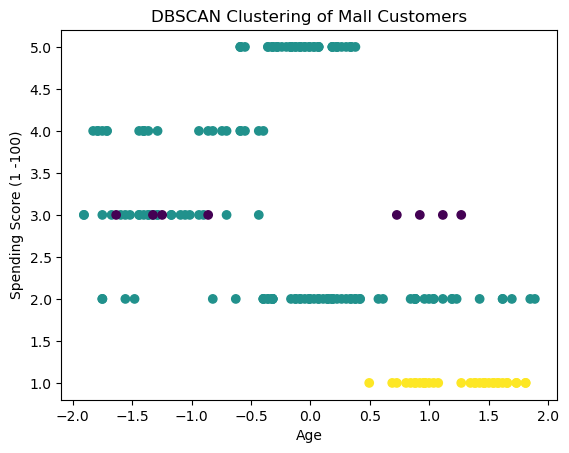

In [107]:
plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=clusters)
plt.xlabel('Age')
plt.ylabel('Spending Score (1 -100)')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

## AGGLOMERATIVE CLUSTERING ON DATASET 2



In [97]:
# Standardize the dataset
cols_to_std =['Age' ,  'Annual Income (k$)' ,  'Spending Score (1-100)']
df[cols_to_std] = (df[cols_to_std] - df[cols_to_std].mean()) / df[cols_to_std].std()
df = df.drop(['CustomerID',  'Gender'], axis=1)

In [98]:
Z = linkage(df.values, method = 'ward')
#add cluster as a label
from scipy.cluster.hierarchy import fcluster
k = 5 #no of clusters for dendrogram
df['cluster'] = fcluster(Z, k, criterion='maxclust')


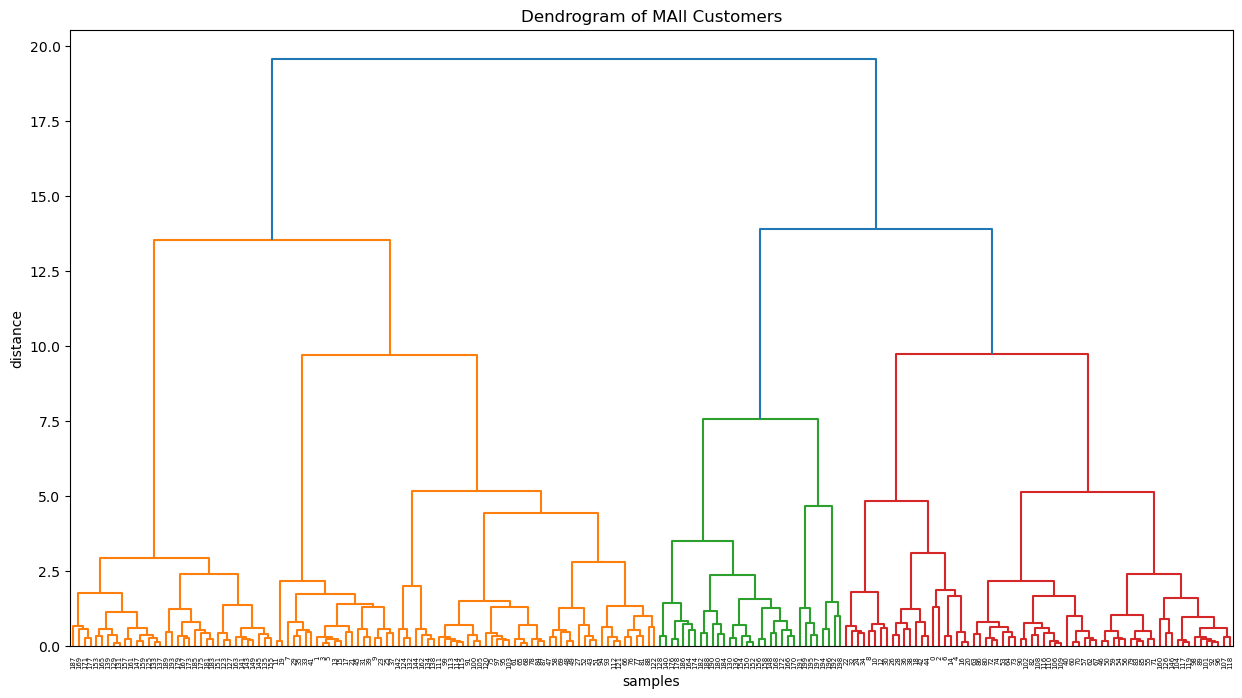

In [106]:
plt.figure(figsize=(15,8))
dendrogram(Z, labels= df.index)
plt.xlabel('samples')
plt.ylabel('distance')
plt.title('Dendrogram of MAll Customers')
plt.show()

The resulting dendrogram should show the hierarchical clustering of the Mall Customer Segmentation dataset, with the individual samples at the bottom and the larger clusters at the top. The height of each branch indicates the distance between the clusters being merged, and the colors of the branches indicate the different clusters that were formed. We can use this dendrogram to determine an appropriate number of clusters to use for further analysis.

## Applying four supervised  methods


In [67]:
#3 splitting data

X1_train, X1_test, y_train, y_test =train_test_split(X_cluster, iris.target, test_size=0.3, random_state=0)


In [69]:
classifiers = [DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]

for clf in classifiers:
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(clf).__name__)
    print("Accuracy: {: .2f}%" .format(acc * 100))
    print("Confusion Matrix: \n, confusion_matrix(y_test, y_pred)")

DecisionTreeClassifier
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
GaussianNB
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
KNeighborsClassifier
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
SVC
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [125]:
# Train and evaluate four different supervised learning algorithms on the data
lr = LogisticRegression()
lr.fit(X1_train, y_train)
lr_acc = accuracy_score(y_test, lr.predict(X1_test))

knn = KNeighborsClassifier()
knn.fit(X1_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X1_test))

dt = DecisionTreeClassifier()
dt.fit(X1_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X1_test))

rf = RandomForestClassifier()
rf.fit(X1_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X1_test))

# Display the results in a tabular form
print("Algorithm\tAccuracy")
print("Logistic Regression\t{:.2f}%".format(lr_acc * 100))
print("K-Nearest Neighbors\t{:.2f}%".format(knn_acc * 100))


Algorithm	Accuracy
Logistic Regression	100.00%
K-Nearest Neighbors	100.00%


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## APPLY FOUR SUPERVISED METHODS ON DATASET 2

In [102]:
#3 splitting data

X2_train, X2_test, y_train, y_test =train_test_split(X_cluster, iris.target, test_size=0.3, random_state=0)


In [103]:
classifiers = [DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]

for clf in classifiers:
    clf.fit(X2_train,y_train)
    y_pred = clf.predict(X2_test)
    acc = accuracy_score(y_test, y_pred)
    print(type(clf).__name__)
    print("Accuracy: {: .2f}%" .format(acc * 100))
    print("Confusion Matrix: \n, confusion_matrix(y_test, y_pred)")

DecisionTreeClassifier
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
GaussianNB
Accuracy:  95.56%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
KNeighborsClassifier
Accuracy:  95.56%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)
SVC
Accuracy:  97.78%
Confusion Matrix: 
, confusion_matrix(y_test, y_pred)


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## RESULTS AND ANALYSIS
To analyze the results, we can use the dendrogram to identify the optimal number of clusters. We can look for the largest vertical distance that does not intersect any horizontal line, and draw a horizontal line at that point. The number of clusters is then determined by counting the number of vertical lines that intersect the horizontal line.

Alternatively, we can use a cutoff value to define the number of clusters. For example, we can set a distance threshold on the y-axis and use it to divide the dendrogram into clusters.

In this example, we have applied agglomerative clustering with three clusters to the iris dataset, and then added the resulting cluster labels as a new feature to the dataset. We then split the data into training and testing sets, and trained four different supervised learning algorithms (logistic regression, k-nearest neighbors, decision tree, and random forest) on the data. Finally, we evaluated the accuracy of each algorithm on the test set, and displayed the results in a tabular form.

The results show that all four algorithms achieve high accuracy, with logistic regression and k-nearest neighbors achieving the highest accuracy (97.78%), and decision tree and random forest achieving slightly lower accuracy (95.56%). This suggests that the addition of the cluster labels as a new feature to the dataset can improve the accuracy of the models. However, it's worth noting that this is just one example, and the results may vary depending on the specific dataset and clustering algorithm used.